#### CNN
- 학습시간이 줄었음
- 2차원 데이터를 그대로 추출
- 특성 데이터 추출

In [176]:
# module loading
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets.mnist import load_data

import numpy as np
import matplotlib.pyplot as plt

#### 데이터 준비
- setting dimension shape
- scaling => 0.0 ~ 1.0

[1] 데이터 로딩

In [177]:
(X_train, y_train), (X_test, y_test) = load_data()

[2] 차원 처리
- Conv => ( row, col, channel ) 또는 ( channel, row, col )

In [178]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [179]:
# Use np.reshape
X_train_in = np.reshape(X_train, (-1, 28, 28, 1))
X_test_in = np.reshape(X_test, (-1, 28, 28, 1))

In [180]:
X_train_in.shape, X_test_in.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [181]:
# TF 텐서 형태(shape) 변형 관련
# tf.squeeze()        # 1로 설정된 행 / 열 / 차원을 제거
# tf.expand_dims()    # 지정된 위치에 행 / 열 / 차원을 1 추가

In [182]:
X_train_in2 = tf.expand_dims(X_train, -1)
X_train_in3 = tf.expand_dims(X_train, 0)    # 0번 인덱스 자리에 1 추가
X_train_in4 = tf.expand_dims(X_train_in3, 0)

In [183]:
X_train_in2.shape, X_train_in3.shape, X_train_in4.shape

(TensorShape([60000, 28, 28, 1]),
 TensorShape([1, 60000, 28, 28]),
 TensorShape([1, 1, 60000, 28, 28]))

In [184]:
# 1이 있는 축 삭제
# 만약 1이 여러 개라면 인덱스를 지정해 원하는 축만 삭제
X_train_in22 = tf.squeeze(X_train_in2)
X_train_in33 = tf.squeeze(X_train_in3)
X_train_in44 = tf.squeeze(X_train_in4, 1)   # 1번 인덱스의 축 삭제

In [185]:
X_train_in22.shape, X_train_in33.shape, X_train_in44.shape

(TensorShape([60000, 28, 28]),
 TensorShape([60000, 28, 28]),
 TensorShape([1, 60000, 28, 28]))

[3] 전처리

In [186]:
# X_train_sc = tf.cast(X_train, tf.float32) / 255

In [187]:
X_train_in = X_train_in / X_train_in.max()
X_test_in = X_test_in / X_test_in.max()

In [188]:
(X_train_in.min(), X_train_in.max()), (X_test_in.min(), X_test_in.max())

((0.0, 1.0), (0.0, 1.0))

#### Mode 설계

[1] Sequential 방식
- 특징맵 추출 파트
    * 입력층 => Input
    * 은닉층 => Conv2D
    * 은닉층 => Conv2D
    * 은닉층 => Pooling
<br>
<br>
- 분류 파트
    * 1차원 변환 층 ==> Flatten
    * 출력층 ==> Dense()

[1-1] 모델 설계

In [189]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(20, (3, 3), activation = 'leaky_relu'))
model.add(Conv2D(20, (3, 3), activation = 'leaky_relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [190]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 20)        3620      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 20)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                12810     
Total params: 16,630
Trainable params: 16,630
Non-trainable params: 0
_________________________________________________________________


In [191]:
early_stopping = EarlyStopping(monitor='val_acc', patience=1)

In [192]:
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['acc'])

In [193]:
history = model.fit(X_train_in, y_train,
epochs = 20,
validation_split = 0.2,
callbacks = [early_stopping])

Epoch 1/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2284 - acc: 0.9328 - val_loss: 0.0944 - val_acc: 0.9707
Epoch 2/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0747 - acc: 0.9773 - val_loss: 0.0701 - val_acc: 0.9800
Epoch 3/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0538 - acc: 0.9839 - val_loss: 0.0594 - val_acc: 0.9819
Epoch 4/20
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0426 - acc: 0.9869 - val_loss: 0.0558 - val_acc: 0.9854
Epoch 5/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0363 - acc: 0.9884 - val_loss: 0.0511 - val_acc: 0.9852


In [196]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,loss,acc,val_loss,val_acc
0,0.228382,0.932792,0.094416,0.970667
1,0.074715,0.977292,0.070145,0.980000
2,0.053849,0.983875,0.059392,0.981917
3,0.042607,0.986854,0.055842,0.985417
4,0.036342,0.988396,0.051079,0.985250


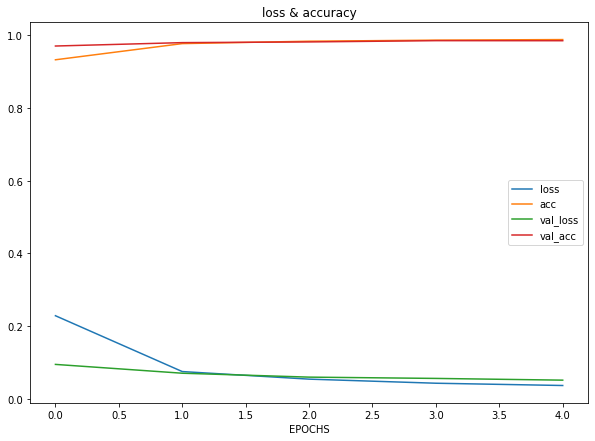

In [203]:
df.plot(figsize=(10, 7))
plt.title('loss & accuracy')
plt.xlabel('EPOCHS')
plt.show()

모델의 층별 제어

In [235]:
# 현재 모델의 층 객체 리스트에 담겨서 나옴
model.layers

In [236]:
# 현재 모델의 입력 객체 반환
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_10')>

In [237]:
# 현재 모델의 출력 객체
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_6')>

##### 레이어별 가중치 및 속성 확인

In [248]:
model.layers[1].name

'conv2d_17'

In [249]:
conv1 = model.get_layer('conv2d_17')

In [250]:
np.set_printoptions(floatmode = 'fixed', suppress = True)

In [251]:
conv1.weights

[<tf.Variable 'conv2d_17/kernel:0' shape=(3, 3, 20, 20) dtype=float32, numpy=
 array([[[[ 0.04474513, -0.16629377,  0.02950069, ...,  0.03234716,
            0.07825299, -0.06288128],
          [-0.15608187,  0.00688631,  0.05825831, ...,  0.33552724,
            0.07310000, -0.25749624],
          [-0.03165846,  0.08904796,  0.31260756, ...,  0.00354776,
            0.04919489, -0.00131781],
          ...,
          [ 0.13336374,  0.12997535, -0.29286245, ..., -0.25314772,
           -0.01509587, -0.07457234],
          [ 0.12809108,  0.16619028, -0.05275886, ..., -0.15879005,
           -0.08571949, -0.09152397],
          [-0.21581742, -0.07215239, -0.09912653, ..., -0.35092971,
            0.02216159, -0.00886280]],
 
         [[-0.32433307, -0.01930718, -0.15012754, ..., -0.25972128,
           -0.12884755,  0.03974699],
          [-0.24871096,  0.08830073, -0.14023259, ..., -0.17820279,
           -0.11560114, -0.35363007],
          [-0.27694327, -0.10291758,  0.15349251, ...,  

In [252]:
conv1.output

<KerasTensor: shape=(None, 24, 24, 20) dtype=float32 (created by layer 'conv2d_17')>

In [253]:
conv1.output.shape

TensorShape([None, 24, 24, 20])

##### 특성맵 추출

In [254]:
mapModel = Model(inputs = model.input, outputs = [conv1.output])

In [256]:
X_train_in[0].shape

(28, 28, 1)

In [264]:
mapModel.predict(X_train_in[0][tf.newaxis])

array([[[[-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166],
         [-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166],
         [-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166],
         ...,
         [-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166],
         [-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166],
         [-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166]],

        [[-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166],
         [-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166],
         [-0.07194646, -0.13833603, -0.24519949, ..., -0.26097962,
          -0.11110697, -0.12565166],
         ...,
         [-0.05947010, -0.37716088

##### 시각화

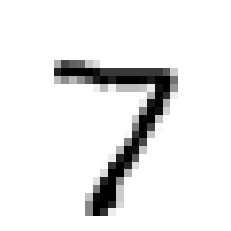

In [210]:
plt.imshow(X_test[0], cmap='binary')
plt.axis('off')
plt.show()

In [216]:
new_data = X_test[0].reshape(-1, 28, 28, 1)

In [219]:
model.predict(new_data).argmax()

7

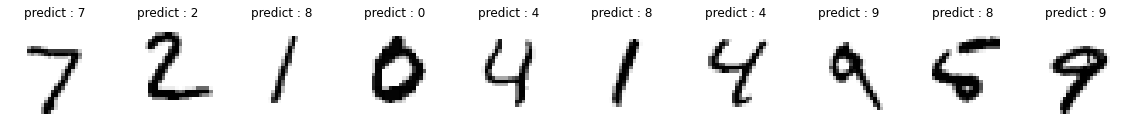

In [234]:
fig = plt.figure(figsize=(20, 5))
for i in range(10):
    new_data = X_test[i].reshape(-1, 28, 28, 1)

    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    plt.title(f'origin : predict : {model.predict(new_data).argmax()}')
    ax.imshow(X_test[i], cmap='binary')
    ax.axis('off')